<a href="https://colab.research.google.com/github/sruthireddy1482/CE888/blob/main/LAB6/Lab6_task7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn import cluster, datasets, metrics
import seaborn as sns

In [2]:
country_data=pd.read_csv("https://raw.githubusercontent.com/sagihaider/CE888_2021/main/Lab_6/Data/Country-data.csv")
country_data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [3]:
country_data.shape

(167, 10)

In [5]:
X=country_data.iloc[:,1:10] # Covariates or input
y=country_data.iloc[:,:1] # Labels or classes or output
print(x.columns)
print(y.columns)

Index(['child_mort', 'exports', 'health', 'imports', 'income', 'inflation',
       'life_expec', 'total_fer', 'gdpp'],
      dtype='object')
Index(['country'], dtype='object')


In [6]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
X=pd.DataFrame(scaler.fit_transform(X),columns= X.columns)

In [7]:
from sklearn.cluster import KMeans
import random
random.seed(101)
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(X)
    distortions.append(kmeanModel.inertia_)

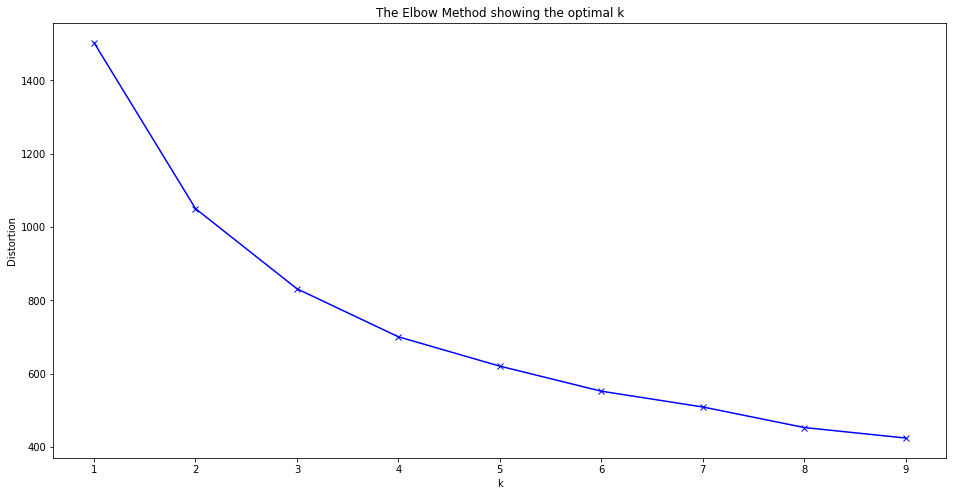

In [8]:
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

optimal number of clusters is 3 based on elbow graph

In [9]:
kmeans=KMeans(n_clusters=3,init='k-means++',random_state=42)
y_kmeans=kmeans.fit_predict(X)
y_kmeans

array([0, 1, 1, 0, 1, 1, 1, 2, 2, 1, 1, 2, 1, 1, 1, 2, 1, 0, 1, 1, 1, 0,
       1, 2, 1, 0, 0, 1, 0, 2, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 2, 2,
       2, 1, 1, 1, 1, 0, 0, 1, 1, 2, 2, 0, 0, 1, 2, 0, 2, 1, 1, 0, 0, 1,
       0, 1, 2, 1, 1, 1, 0, 2, 2, 2, 1, 2, 1, 1, 0, 0, 2, 1, 0, 1, 1, 0,
       0, 1, 1, 2, 1, 0, 0, 1, 1, 0, 2, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       2, 2, 0, 0, 2, 1, 0, 1, 1, 1, 1, 1, 2, 2, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 2, 2, 2, 1, 0, 2, 2, 1, 1, 0, 1, 2, 2, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 2, 2, 2, 1, 1, 1, 1, 1, 0, 0], dtype=int32)

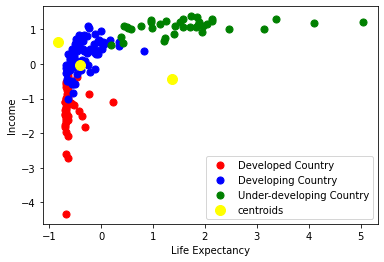

In [11]:
X = np.array(X)
plt.scatter(X[y_kmeans==0,8],X[y_kmeans==0,6],s=50,c='red',label='Developed Country')
plt.scatter(X[y_kmeans==1,8],X[y_kmeans==1,6],s=50,c='blue',label='Developing Country')
plt.scatter(X[y_kmeans==2,8],X[y_kmeans==2,6],s=50,c='green',label='Under-developing Country')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=100,c='yellow',label="centroids")

plt.xlabel('Life Expectancy')
plt.ylabel('Income')
plt.legend()
plt.show()

The countries with high life expectancy and high income are developed countries. The countries with lower income and life expectancy when compared to developed countries are developing countries and the countries with less income and life expectancy are under developing countries.